In [1]:
import tensorflow as tf
import numpy as np

# Approximate sine wave

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

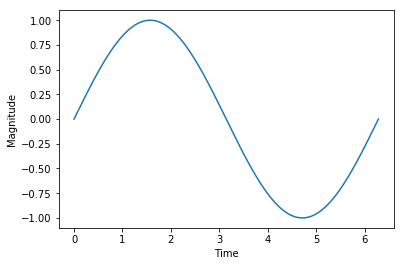

In [8]:
t = np.linspace(0.0, 360.0, 10000)*(np.pi/180.0)
y = np.sin(t)
plt.plot(t, y)
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()

In [9]:
# Set up the network as the tf.estimator

In [78]:
state = tf.placeholder(dtype=tf.float64, shape=[None, 1])
y_t = tf.placeholder(dtype=tf.float64, shape=[None, 1])
# Layer 1
w1 = tf.Variable(np.random.rand(1, 20), dtype=tf.float64)
b1 = tf.Variable(np.random.rand(20), dtype=tf.float64)
z1 = tf.tensordot(state, w1, axes=1) + b1
y1 = tf.nn.relu(z1)
# Layer 2
w2 = tf.Variable(np.random.rand(20, 20), dtype=tf.float64)
b2 = tf.Variable(np.random.rand(20), dtype=tf.float64)
z2 = tf.tensordot(w2, y1, axes=1) + b2
y2 = tf.nn.relu(z1)
# Layer 3
w3 = tf.Variable(np.random.rand(20, 1), dtype=tf.float64)
b3 = tf.Variable(np.random.rand(1), dtype=tf.float64)
z2 = tf.tensordot(y2, w3, axes=1) + b3
# Loss function
loss = tf.reduce_mean(tf.square(z2 - y_t))
optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

In [79]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [80]:
theta_np = np.linspace(0.0, 360.0, 10000)*((3.14)/180.0)
for i in range(100000):
    tr = np.random.choice(np.linspace(0, 9999, 9999, dtype=int), 32)
    temp = np.asarray([theta_np[i] for i in tr])
    temp = temp.reshape(32, 1)
    sess.run(train, {state:temp, y_t:np.sin(temp)})
    l = sess.run(loss, {state:temp, y_t:np.sin(temp)})
    if i%10000 == 0:
        print("loss: %s"%(l))

loss: 352.521795672
loss: 0.115122863319
loss: 0.0028776291612
loss: 0.00339037440805
loss: 0.00208700975076
loss: 0.00188281853965
loss: 0.00323745831547
loss: 0.00340705305168
loss: 0.00270607163514
loss: 0.00199394459535


In [81]:
theta_np = theta_np.reshape(10000,1)
y = sess.run(z2, {state:theta_np})

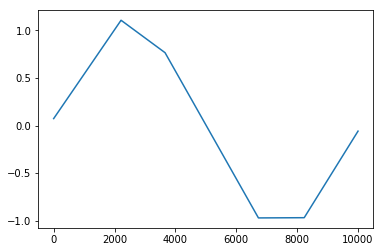

In [82]:
plt.plot(y)
plt.show()